# Vehicle_Insurance_Analysis

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv("Vehicle_Insurance.csv")
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [5]:
# Removing the id column as it is spoiling the data

df.drop('id',axis=1,inplace=True)

In [6]:
# Checking whether there is any duplicated data present in the dataset

df.duplicated().sum()

269

In [7]:
# Deleting the duplicated data

df = df.drop_duplicates()

In [8]:
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [9]:
df.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,380840.000000,380840.000000,380840.000000,380840.000000,380840.000000,380840.000000,380840.000000,380840.000000
mean,38.823593,0.997868,26.388307,0.458208,30584.016078,112.030225,154.344607,0.122584
std,15.513206,0.046126,13.229907,0.498251,17203.258664,54.206194,83.670240,0.327960
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24426.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31678.500000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39408.000000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [10]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [11]:
df.loc[(df.Vehicle_Damage=="Yes") & (df.Driving_License==1),"Response"].unique()

array([1, 0], dtype=int64)

In [12]:
df.shape

(380840, 11)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 380840 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                380840 non-null  object 
 1   Age                   380840 non-null  int64  
 2   Driving_License       380840 non-null  int64  
 3   Region_Code           380840 non-null  float64
 4   Previously_Insured    380840 non-null  int64  
 5   Vehicle_Age           380840 non-null  object 
 6   Vehicle_Damage        380840 non-null  object 
 7   Annual_Premium        380840 non-null  float64
 8   Policy_Sales_Channel  380840 non-null  float64
 9   Vintage               380840 non-null  int64  
 10  Response              380840 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 34.9+ MB


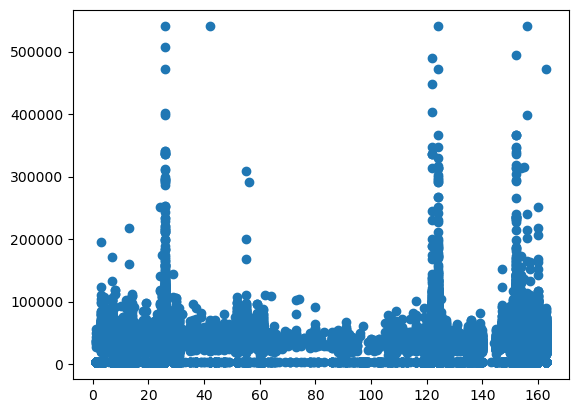

In [14]:
# sns.heatmap(df[["Age","Annual_Premium"]],annot=True)
# df[["Age","Annual_Premium"]].corr()

plt.scatter(df["Policy_Sales_Channel"],df["Annual_Premium"])



## Data cleaning
###### Handling the Missing and Null Values in the Dataset

In [15]:
df.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

###### This shows that the entire dataset is devoid of any inconsistencies and it does not conatin any null values.

### Handle missing values and outliers appropriately.

<Axes: xlabel='Annual_Premium'>

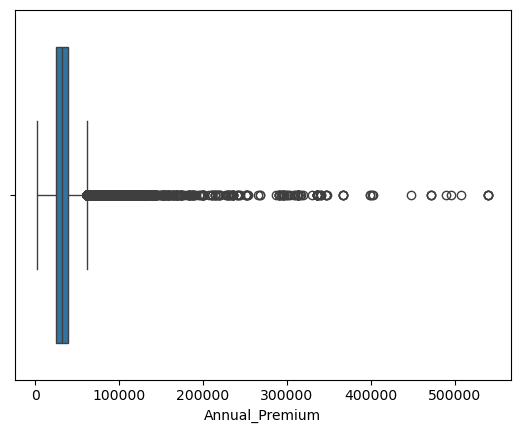

In [16]:
sns.boxplot(df.Annual_Premium,orient='h')

In [17]:
Q1,Q3 = df.Annual_Premium.quantile([0.25,0.75])

In [18]:
Q1,Q3

(24426.0, 39408.0)

In [19]:
IQR = Q3 - Q1

In [20]:
IQR

14982.0

In [21]:
Ub = Q3 + (IQR)*1.5
Lb = Q1 - (IQR)*1.5

In [22]:
Ub,Lb

(61881.0, 1953.0)

In [23]:
df[df.Annual_Premium>Ub]

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
25,Female,21,1,28.0,1,< 1 Year,No,61964.0,152.0,72,0
37,Female,25,1,28.0,1,< 1 Year,No,76251.0,152.0,107,0
67,Male,60,1,28.0,0,1-2 Year,Yes,66338.0,124.0,73,0
139,Male,21,1,29.0,1,< 1 Year,No,62164.0,152.0,116,0
149,Female,22,1,11.0,1,< 1 Year,No,76651.0,152.0,258,0
...,...,...,...,...,...,...,...,...,...,...,...
380959,Male,25,1,8.0,1,< 1 Year,No,61909.0,152.0,161,0
380998,Female,33,1,8.0,0,1-2 Year,Yes,101664.0,124.0,21,0
381035,Female,22,1,11.0,1,< 1 Year,No,62889.0,152.0,295,0
381047,Female,52,1,8.0,1,1-2 Year,No,71915.0,7.0,233,0


In [24]:
df.Annual_Premium = np.where(df.Annual_Premium>Ub,Ub,df.Annual_Premium) 

In [25]:
df[df.Annual_Premium>Ub]

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response


In [26]:
df.duplicated().sum()

142

In [27]:
df = df.drop_duplicates()

In [28]:
df.duplicated().sum()

0

In [29]:
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [30]:
df.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,380698.000000,380698.000000,380698.000000,380698.000000,380698.000000,380698.000000,380698.000000,380698.000000
mean,38.825647,0.997867,26.389616,0.458116,30155.360863,112.025564,154.347506,0.122609
std,15.513191,0.046134,13.231084,0.498243,15454.725946,54.207629,83.670715,0.327988
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24423.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31674.000000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39395.750000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,61881.000000,163.000000,299.000000,1.000000


In [31]:
df[df.Annual_Premium<3000]

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
5,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
15,Male,37,1,6.0,0,1-2 Year,Yes,2630.0,156.0,147,1
30,Female,26,1,8.0,0,< 1 Year,No,2630.0,160.0,136,0
43,Female,38,1,35.0,1,1-2 Year,No,2630.0,152.0,153,0
58,Female,62,1,48.0,0,1-2 Year,Yes,2630.0,15.0,295,0
...,...,...,...,...,...,...,...,...,...,...,...
381070,Female,28,1,11.0,0,< 1 Year,Yes,2630.0,124.0,106,0
381086,Female,34,1,35.0,0,1-2 Year,Yes,2630.0,152.0,208,0
381092,Male,38,1,28.0,1,1-2 Year,No,2630.0,124.0,130,0
381094,Female,47,1,20.0,0,1-2 Year,Yes,2630.0,26.0,84,0


In [32]:
df.Policy_Sales_Channel.value_counts()

Policy_Sales_Channel
152.0    134584
26.0      79619
124.0     73913
160.0     21768
156.0     10642
          ...  
149.0         1
43.0          1
144.0         1
143.0         1
41.0          1
Name: count, Length: 155, dtype: int64

## Data Visualization:.

In [33]:
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


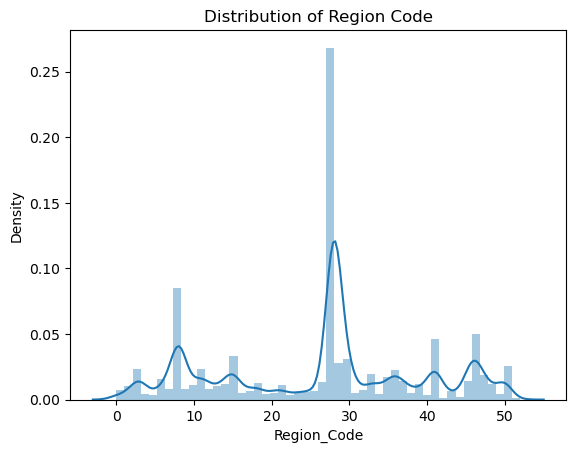

In [34]:
sns.distplot(df.Region_Code)
plt.title('Distribution of Region Code')
plt.show()

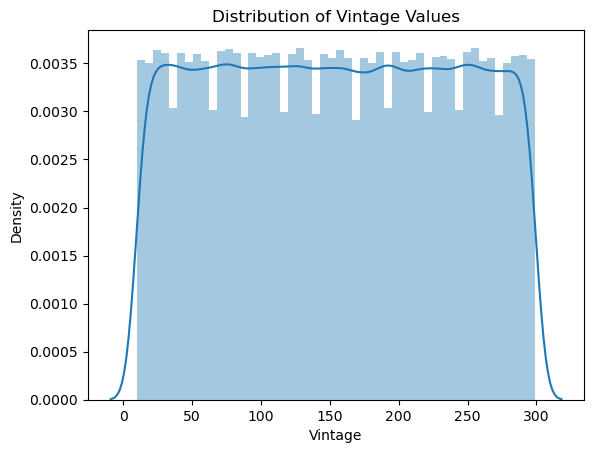

In [35]:
sns.distplot(df.Vintage)
plt.title('Distribution of Vintage Values')
plt.show()

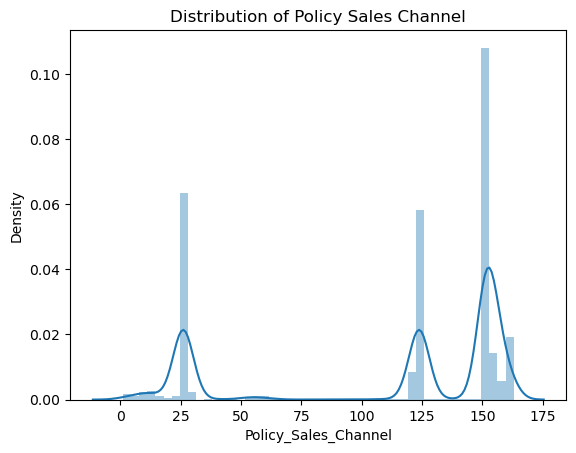

In [36]:
sns.distplot(df.Policy_Sales_Channel)
plt.title('Distribution of Policy Sales Channel')
plt.show()

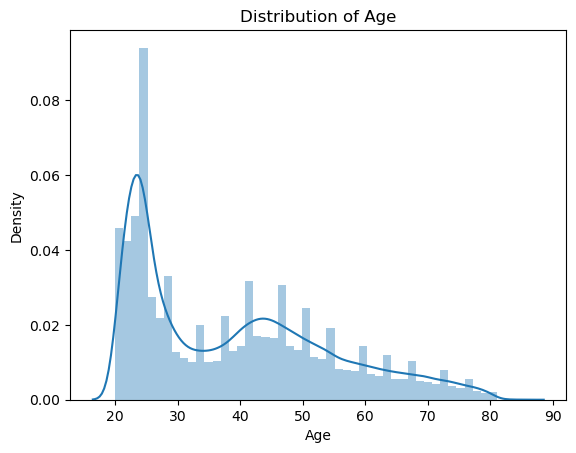

In [37]:
sns.distplot(df.Age)
plt.title('Distribution of Age')
plt.show()

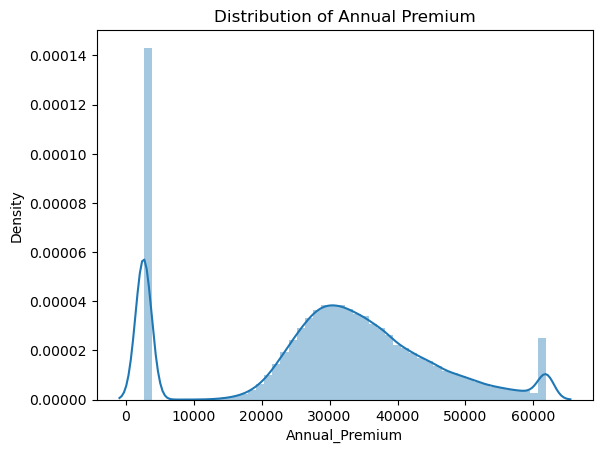

In [38]:
sns.distplot(df.Annual_Premium)
plt.title('Distribution of Annual Premium')
plt.show()

## Feature Analysis:

In [39]:
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [40]:
df.Annual_Premium.mean()

30155.36086346658

In [41]:
df.Annual_Premium.median()

31674.0

In [42]:
df.Annual_Premium.value_counts()

Annual_Premium
2630.0     64609
61881.0    10190
39008.0       41
45179.0       38
38287.0       38
           ...  
54093.0        1
20850.0        1
50199.0        1
55600.0        1
20706.0        1
Name: count, Length: 41661, dtype: int64

In [43]:
df.Annual_Premium.min()

2630.0

In [44]:
df.Annual_Premium.max()

61881.0

In [45]:
df.Annual_Premium.std()

15454.72594586234

In [46]:
df.Annual_Premium.var()

238848554.06171057

In [47]:
df.Policy_Sales_Channel.mean()

112.02556357007391

In [48]:
df.Policy_Sales_Channel.median()

133.0

In [49]:
# Region Code
# Vintage
# Annual_Premium
# Policy_Sales_Channel	

In [50]:
df.Annual_Premium.value_counts().sort_values(ascending= False).head(10)

Annual_Premium
2630.0     64609
61881.0    10190
39008.0       41
45179.0       38
38287.0       38
43707.0       36
30117.0       36
36086.0       35
35074.0       35
38452.0       34
Name: count, dtype: int64

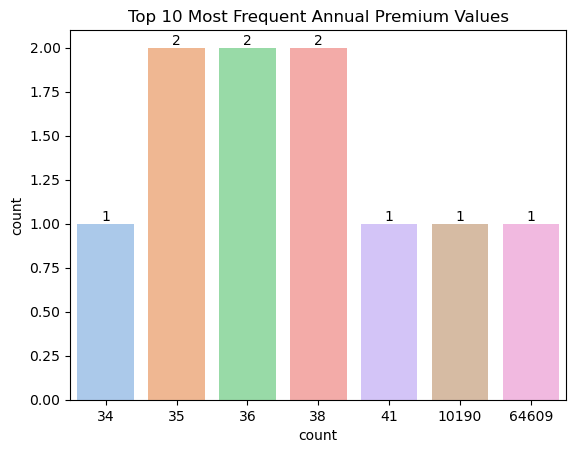

In [51]:
a=sns.countplot(x=df.Annual_Premium.value_counts().sort_values(ascending= False).head(10),palette='pastel')

for i in a.containers:
    a.bar_label(i)
plt.title('Top 10 Most Frequent Annual Premium Values')
plt.show()

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 380698 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                380698 non-null  object 
 1   Age                   380698 non-null  int64  
 2   Driving_License       380698 non-null  int64  
 3   Region_Code           380698 non-null  float64
 4   Previously_Insured    380698 non-null  int64  
 5   Vehicle_Age           380698 non-null  object 
 6   Vehicle_Damage        380698 non-null  object 
 7   Annual_Premium        380698 non-null  float64
 8   Policy_Sales_Channel  380698 non-null  float64
 9   Vintage               380698 non-null  int64  
 10  Response              380698 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 34.9+ MB


In [52]:
df.Vehicle_Damage.value_counts()

Vehicle_Damage
Yes    192235
No     188463
Name: count, dtype: int64

In [53]:
df.Vintage.value_counts().head()

Vintage
256    1416
73     1406
282    1393
187    1391
158    1390
Name: count, dtype: int64

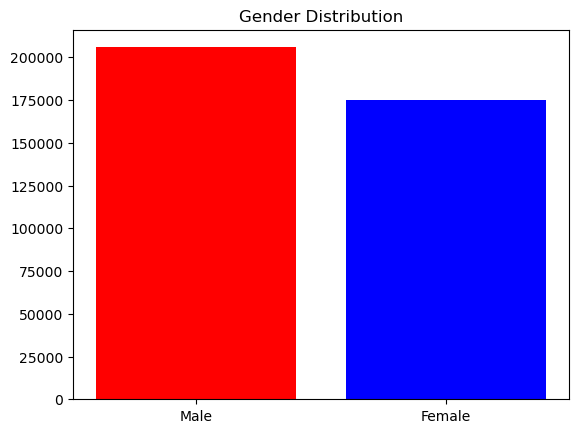

In [54]:
plt.bar(x = df.Gender.value_counts().index,
           height = df.Gender.value_counts(),color=['red','blue'])
plt.title('Gender Distribution')
plt.show()

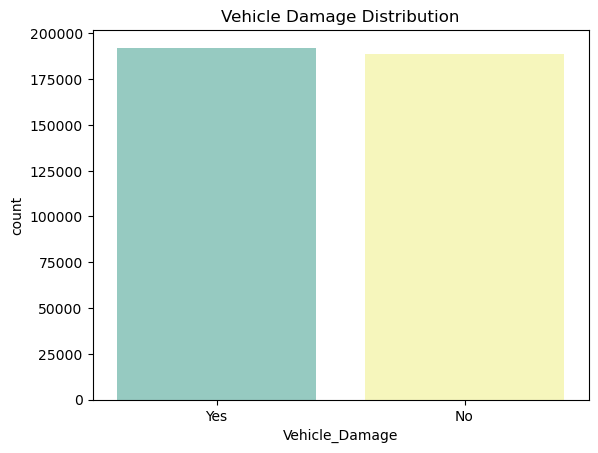

In [55]:
sns.barplot(x = df.Vehicle_Damage.value_counts().index,
           y = df.Vehicle_Damage.value_counts(),palette='Set3')
plt.title('Vehicle Damage Distribution')
plt.show()

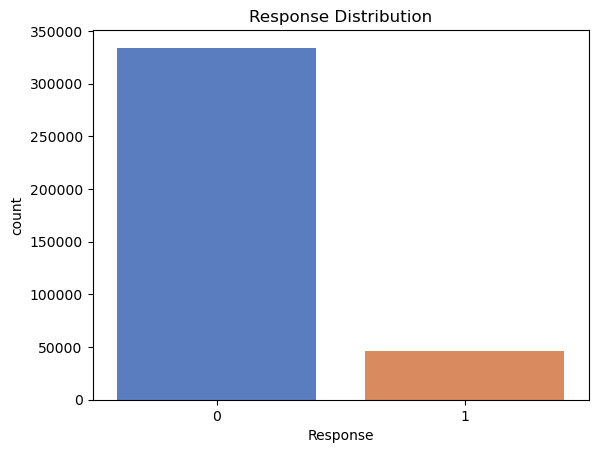

In [56]:
sns.barplot(x = df.Response.value_counts().index,
           y = df.Response.value_counts(),palette='muted')
plt.title('Response Distribution')
plt.show()

In [57]:
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


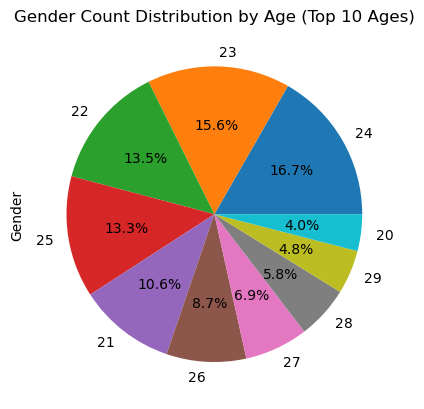

In [58]:
df.groupby('Age')['Gender'].count().head(10).sort_values(ascending=False).plot(kind='pie',autopct='%1.1f%%')
plt.title('Gender Count Distribution by Age (Top 10 Ages)')
plt.show()

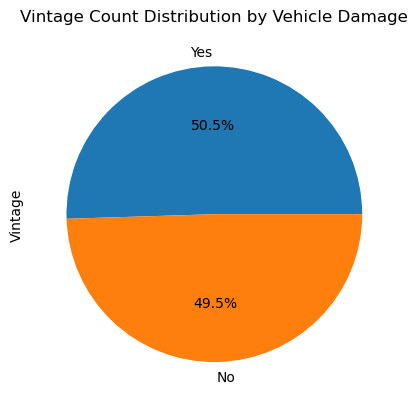

In [59]:
df.groupby('Vehicle_Damage')['Vintage'].count().sort_values(ascending=False).plot(kind='pie',autopct='%1.1f%%')
plt.title('Vintage Count Distribution by Vehicle Damage')
plt.show()

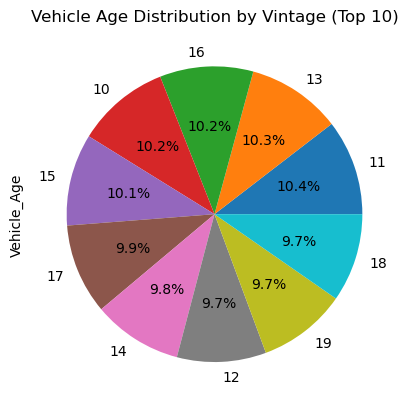

In [60]:
df.groupby('Vintage')['Vehicle_Age'].count().head(10).sort_values(ascending=False).plot(kind='pie',autopct='%1.1f%%')
plt.title('Vehicle Age Distribution by Vintage (Top 10)')
plt.show()

In [61]:
df.groupby('Gender')['Annual_Premium'].count().sort_values(ascending=False)#.plot(kind='pie',autopct='%1.1f%%')

Gender
Male      205871
Female    174827
Name: Annual_Premium, dtype: int64

In [62]:
df.groupby('Vehicle_Damage')['Age'].sum()

Vehicle_Damage
No     6527749
Yes    8253097
Name: Age, dtype: int64

In [63]:
df.groupby('Vehicle_Damage')['Age'].mean()

Vehicle_Damage
No     34.636767
Yes    42.932333
Name: Age, dtype: float64

In [64]:
df.groupby(['Vehicle_Damage','Gender'])['Age'].count()

Vehicle_Damage  Gender
No              Female     95234
                Male       93229
Yes             Female     79593
                Male      112642
Name: Age, dtype: int64

In [65]:
df.Policy_Sales_Channel.value_counts()

Policy_Sales_Channel
152.0    134584
26.0      79619
124.0     73913
160.0     21768
156.0     10642
          ...  
149.0         1
43.0          1
144.0         1
143.0         1
41.0          1
Name: count, Length: 155, dtype: int64

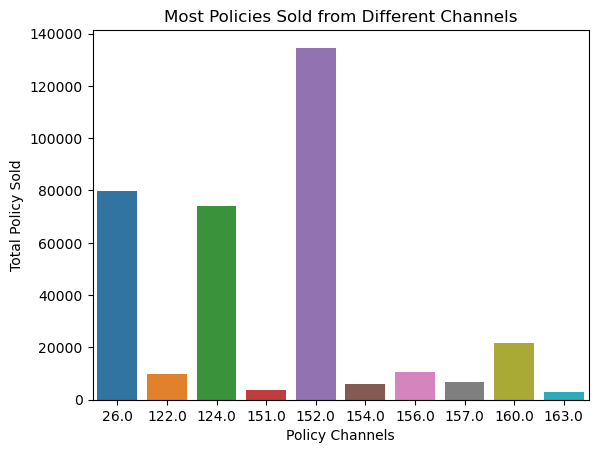

In [66]:
# Most Policy sold from channels

sns.barplot(x = df.Policy_Sales_Channel.value_counts().head(10).index,
           y = df.Policy_Sales_Channel.value_counts().head(10),palette='tab10')
plt.xlabel('Policy Channels')
plt.ylabel('Total Policy Sold')
plt.title('Most Policies Sold from Different Channels')
plt.show()

In [67]:
# Which region code has most policies
# Count and toal procing

df.groupby('Region_Code')['Annual_Premium'].count().sort_values(ascending=False)


Region_Code
28.0    106231
8.0      33820
46.0     19747
41.0     18255
15.0     13300
30.0     12177
29.0     11052
50.0     10237
3.0       9245
11.0      9229
36.0      8788
33.0      7647
47.0      7434
35.0      6939
6.0       6277
45.0      5603
37.0      5501
18.0      5150
14.0      4677
48.0      4654
39.0      4642
10.0      4372
21.0      4266
2.0       4037
13.0      4034
7.0       3275
12.0      3197
9.0       3101
27.0      2819
32.0      2784
43.0      2639
17.0      2616
26.0      2587
25.0      2502
24.0      2415
38.0      2026
0.0       2015
16.0      2005
23.0      1959
31.0      1948
20.0      1931
49.0      1831
4.0       1798
34.0      1663
19.0      1535
22.0      1309
40.0      1295
5.0       1279
1.0       1006
44.0       808
42.0       591
52.0       267
51.0       183
Name: Annual_Premium, dtype: int64

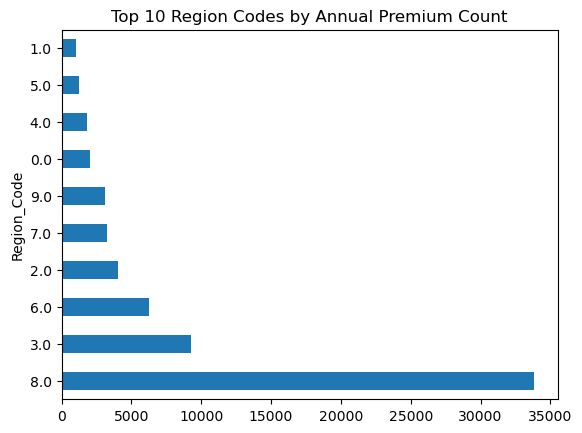

In [68]:
df.groupby('Region_Code')['Annual_Premium'].count().head(10).sort_values(ascending=False).plot(kind='barh')
plt.title('Top 10 Region Codes by Annual Premium Count')
plt.show()

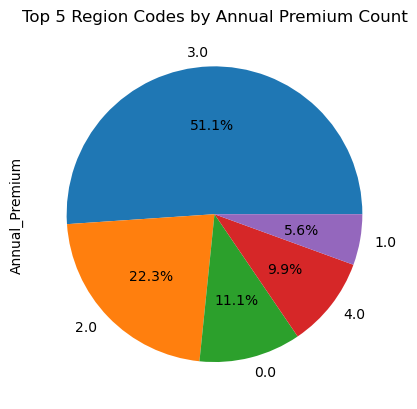

In [69]:
df.groupby('Region_Code')['Annual_Premium'].count().head(5).sort_values(ascending=False).plot(kind='pie',autopct='%1.1f%%')
plt.title('Top 5 Region Codes by Annual Premium Count')
plt.show()

In [70]:
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


## Age Distribution:

In [71]:
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [72]:
df.Age.value_counts()

Age
24    25909
23    24230
22    20949
25    20596
21    16448
      ...  
81       56
82       29
83       22
84       11
85       11
Name: count, Length: 66, dtype: int64

In [73]:
df.Driving_License.value_counts()

Driving_License
1    379886
0       812
Name: count, dtype: int64

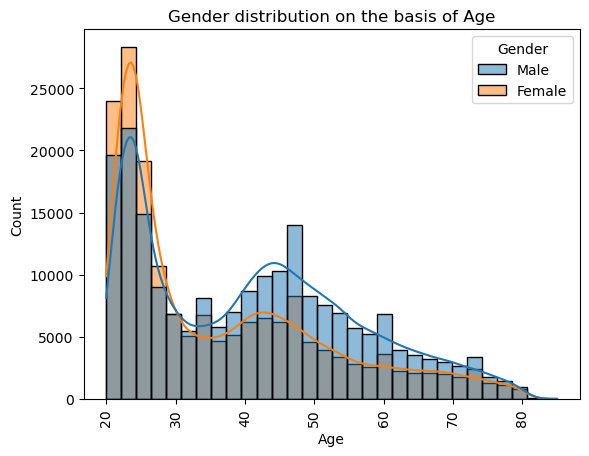

In [74]:
sns.histplot(x=df.Age, hue=df.Gender, kde=True, bins=30)
plt.xticks(rotation=90)
plt.title('Gender distribution on the basis of Age')
plt.show()

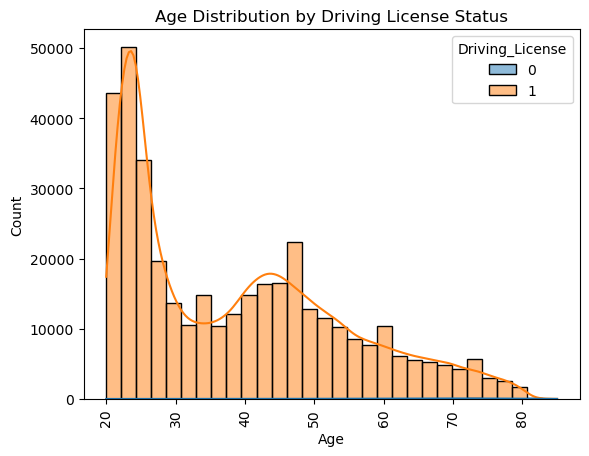

In [75]:
sns.histplot(x=df.Age, hue=df.Driving_License, kde=True, bins=30)
plt.xticks(rotation=90)
plt.title('Age Distribution by Driving License Status')
plt.show()

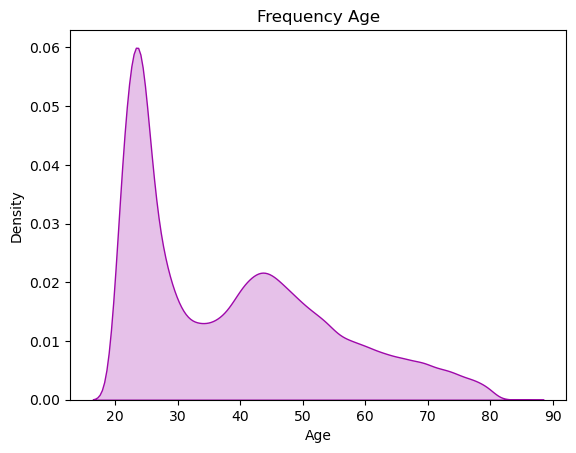

In [76]:
sns.kdeplot(df.Age,color='#9E08AA',fill=True)
plt.title('Frequency Age')
plt.show()

In [77]:
df.groupby('Age')['Response'].count()

Age
20     6227
21    16448
22    20949
23    24230
24    25909
      ...  
81       56
82       29
83       22
84       11
85       11
Name: Response, Length: 66, dtype: int64

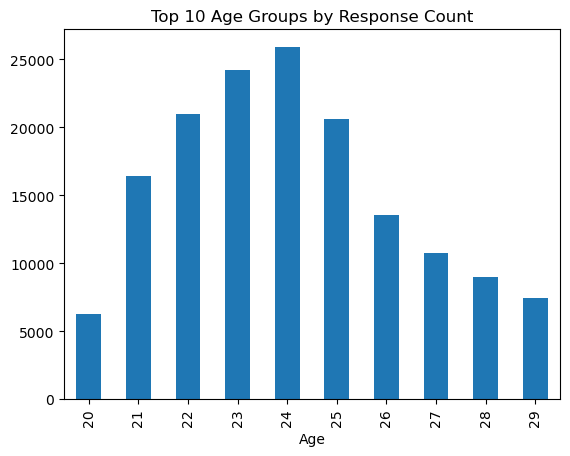

In [78]:
df.groupby('Age')['Response'].count().head(10).plot(kind='bar')
plt.title('Top 10 Age Groups by Response Count')
plt.show()

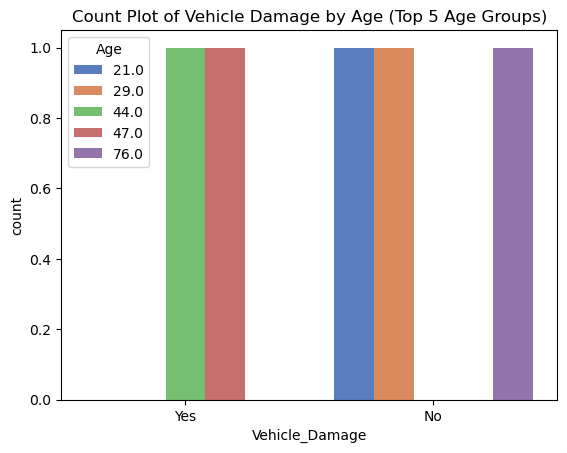

In [79]:
sns.countplot(x=df.Vehicle_Damage.head(40),hue=df.Age.head(5),palette='muted')
plt.title('Count Plot of Vehicle Damage by Age (Top 5 Age Groups)')
plt.show()

In [80]:
df.Vehicle_Damage.value_counts()

Vehicle_Damage
Yes    192235
No     188463
Name: count, dtype: int64

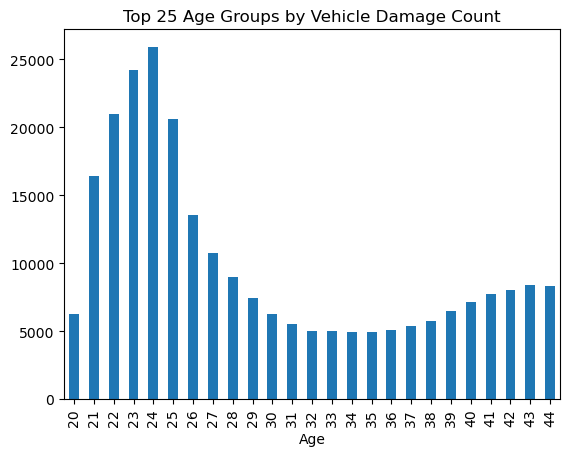

In [81]:
df.groupby('Age')['Vehicle_Damage'].count().head(25).plot(kind='bar')
plt.title('Top 25 Age Groups by Vehicle Damage Count')
plt.xticks(rotation=90)
plt.show()

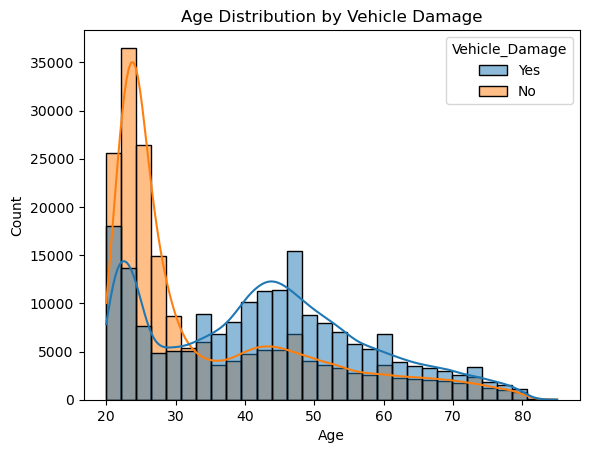

In [82]:
sns.histplot(x=df.Age, hue=df.Vehicle_Damage, kde=True, bins=30)
plt.title('Age Distribution by Vehicle Damage')
plt.show()

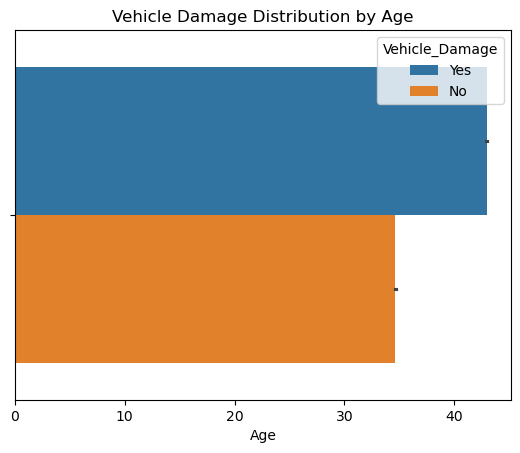

In [115]:
sns.barplot(x=df.Age,hue=df.Vehicle_Damage,orient='h')
plt.title('Vehicle Damage Distribution by Age')
plt.show()

In [84]:
df.Vehicle_Damage.value_counts()

Vehicle_Damage
Yes    192235
No     188463
Name: count, dtype: int64

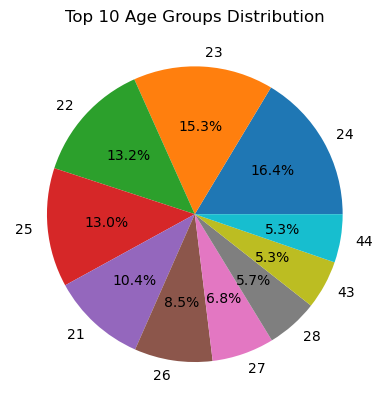

In [119]:
plt.pie(x=df.Age.value_counts().head(10),labels=df.Age.value_counts().head(10).index,autopct='%1.1f%%')
plt.title('Top 10 Age Groups Distribution')
plt.show()

## Premium Analysis:

In [86]:
df.corr(numeric_only=True)

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
Age,1.000000,-0.079808,0.042447,-0.254514,0.067181,-0.577731,-0.001323,0.111034
Driving_License,-0.079808,1.000000,-0.001079,0.014969,-0.012522,0.043744,-0.000848,0.010165
Region_Code,0.042447,-0.001079,1.000000,-0.024556,-0.009465,-0.042297,-0.002786,0.010541
Previously_Insured,-0.254514,0.014969,-0.024556,1.000000,0.006875,0.219204,0.002636,-0.341176
Annual_Premium,0.067181,-0.012522,-0.009465,0.006875,1.000000,-0.118495,-0.000634,0.022126
Policy_Sales_Channel,-0.577731,0.043744,-0.042297,0.219204,-0.118495,1.000000,0.000056,-0.138941
Vintage,-0.001323,-0.000848,-0.002786,0.002636,-0.000634,0.000056,1.000000,-0.001046
Response,0.111034,0.010165,0.010541,-0.341176,0.022126,-0.138941,-0.001046,1.000000


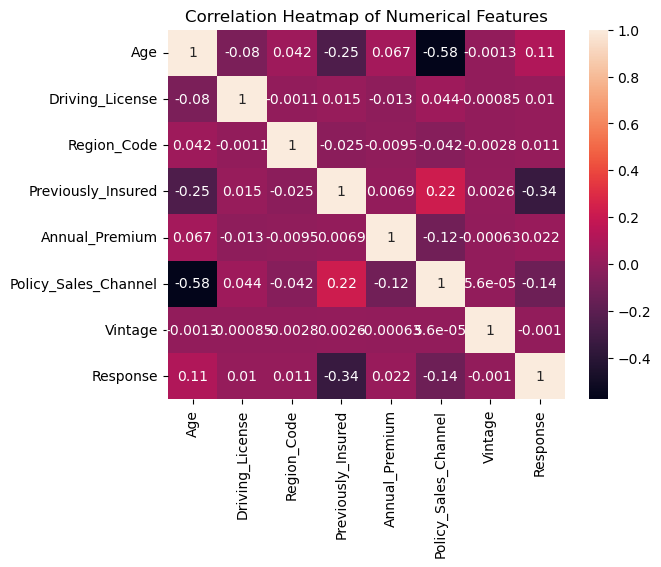

In [120]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

## Claim Frequencies:

## Gender Analysis:

In [88]:
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


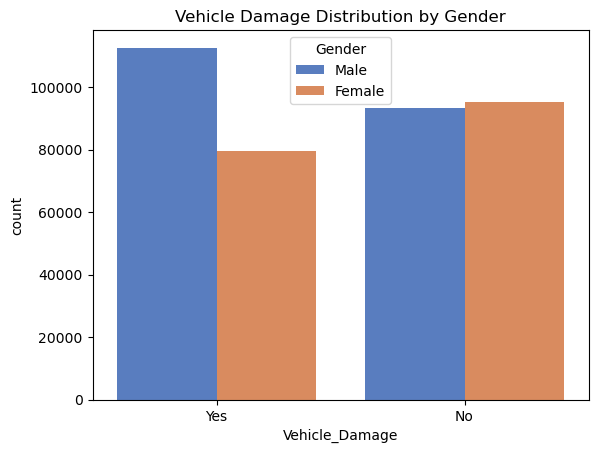

In [124]:
sns.countplot(x=df.Vehicle_Damage,hue=df.Gender,palette='muted')
plt.title('Vehicle Damage Distribution by Gender')
plt.show()

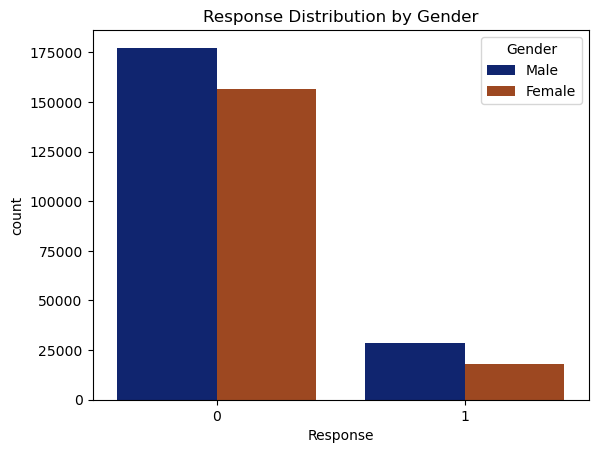

In [129]:
sns.countplot(x=df.Response,hue=df.Gender,palette='dark')
plt.title('Response Distribution by Gender')
plt.show()
# plt.legend(loc=)

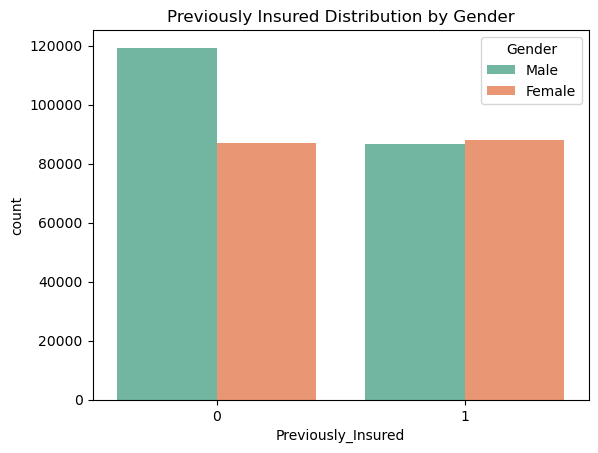

In [130]:
sns.countplot(x=df.Previously_Insured,hue=df.Gender,palette='Set2')
plt.title('Previously Insured Distribution by Gender')
plt.show()

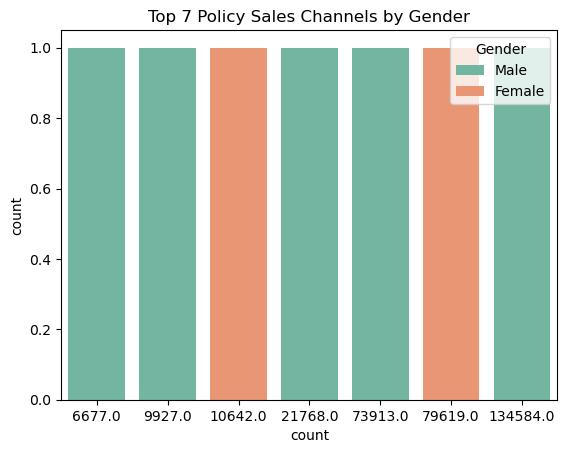

In [131]:
sns.countplot(x=df.Policy_Sales_Channel.value_counts().head(7),hue=df.Gender,palette='Set2')
plt.title('Top 7 Policy Sales Channels by Gender')
plt.show()

## Vehicle Age and Claims:

In [93]:
df.Vehicle_Age.value_counts()

Vehicle_Age
1-2 Year     200125
< 1 Year     164574
> 2 Years     15999
Name: count, dtype: int64

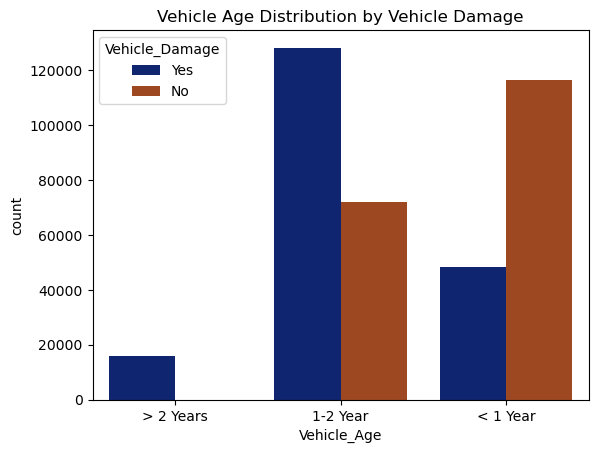

In [132]:
sns.countplot(x=df.Vehicle_Age,hue=df.Vehicle_Damage,palette='dark')
plt.title('Vehicle Age Distribution by Vehicle Damage')
plt.show()

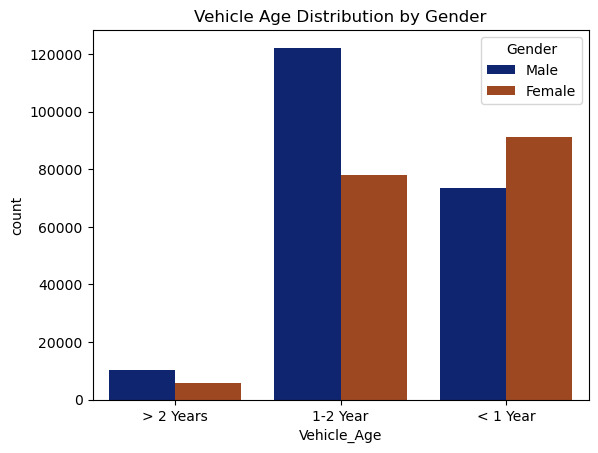

In [133]:
sns.countplot(x=df.Vehicle_Age,hue=df.Gender,palette='dark')
plt.title('Vehicle Age Distribution by Gender')
plt.show()

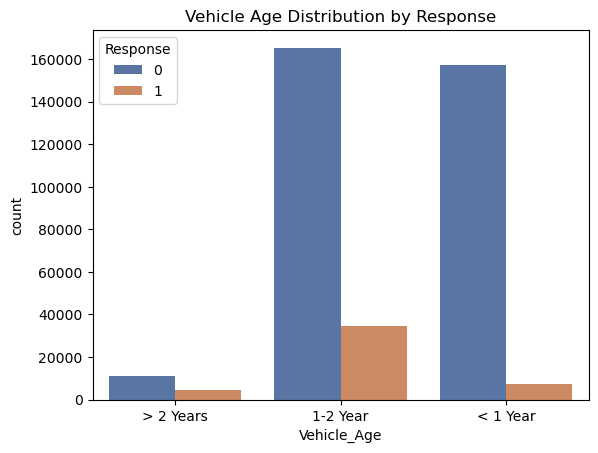

In [134]:
sns.countplot(x=df.Vehicle_Age,hue=df.Response,palette='deep')
plt.title('Vehicle Age Distribution by Response')
plt.show()

## Region-wise Analysis:

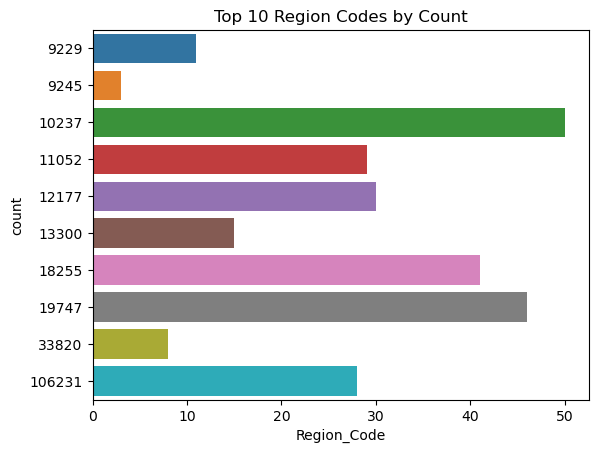

In [135]:
sns.barplot(x = df.Region_Code.value_counts().head(10).index,
           y = df.Region_Code.value_counts().head(10),orient='h',palette='tab10')
plt.title('Top 10 Region Codes by Count')
plt.show()

In [98]:
df.Region_Code.value_counts().sort_values(ascending=False).head(10)

Region_Code
28.0    106231
8.0      33820
46.0     19747
41.0     18255
15.0     13300
30.0     12177
29.0     11052
50.0     10237
3.0       9245
11.0      9229
Name: count, dtype: int64

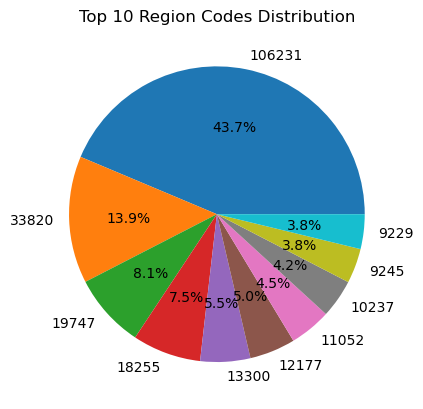

In [137]:
plt.pie(x=df.Region_Code.value_counts().sort_values(ascending=False).head(10),labels=df.Region_Code.value_counts().head(10)
       ,autopct='%1.1f%%')
plt.title('Top 10 Region Codes Distribution')
plt.show()

## Policy Analysis:

In [100]:
df.Policy_Sales_Channel.value_counts().head(15)

Policy_Sales_Channel
152.0    134584
26.0      79619
124.0     73913
160.0     21768
156.0     10642
122.0      9927
157.0      6677
154.0      5992
151.0      3884
163.0      2893
13.0       1865
25.0       1847
7.0        1597
8.0        1515
30.0       1410
Name: count, dtype: int64

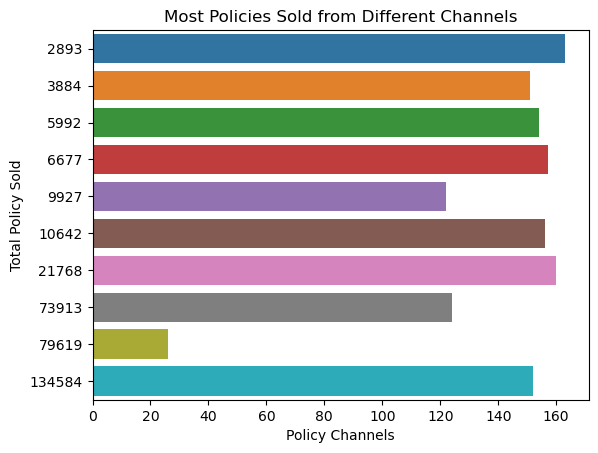

In [101]:
sns.barplot(x = df.Policy_Sales_Channel.value_counts().head(10).index,
           y = df.Policy_Sales_Channel.value_counts().head(10),orient='h',palette='tab10')
plt.xlabel('Policy Channels')
plt.ylabel('Total Policy Sold')
plt.title('Most Policies Sold from Different Channels')
plt.show()

## Claim Frequency by Vehicle Damage:

In [102]:
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [103]:
df.Response.value_counts()

Response
0    334021
1     46677
Name: count, dtype: int64

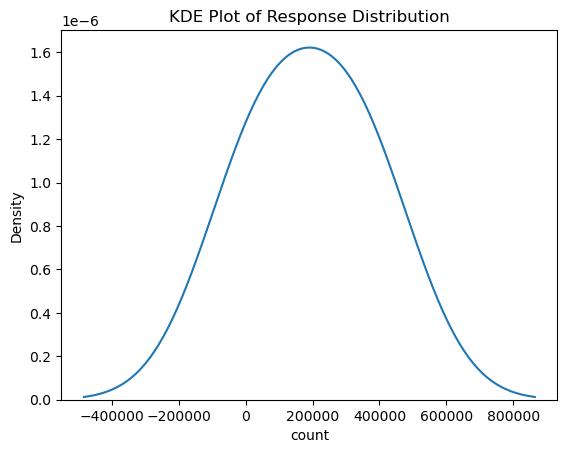

In [138]:
sns.kdeplot(df.Response.value_counts())
plt.title('KDE Plot of Response Distribution')
plt.show()

## Customer Loyalty:

In [105]:
df.Previously_Insured.value_counts()

Previously_Insured
0    206294
1    174404
Name: count, dtype: int64

In [106]:
df.Policy_Sales_Channel.value_counts()

Policy_Sales_Channel
152.0    134584
26.0      79619
124.0     73913
160.0     21768
156.0     10642
          ...  
149.0         1
43.0          1
144.0         1
143.0         1
41.0          1
Name: count, Length: 155, dtype: int64

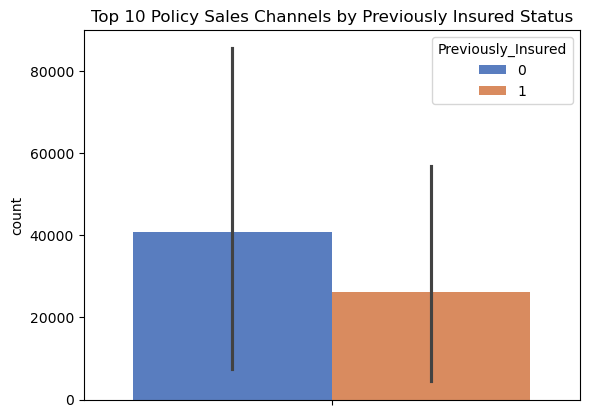

In [139]:
sns.barplot(y=df.Policy_Sales_Channel.value_counts().head(10),hue=df.Previously_Insured,palette='muted')
plt.title('Top 10 Policy Sales Channels by Previously Insured Status')
plt.show()

## Time Analysis:

In [108]:
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [109]:
df.Previously_Insured.value_counts()

Previously_Insured
0    206294
1    174404
Name: count, dtype: int64

In [110]:
df.groupby('Previously_Insured')['Age'].mean()

Previously_Insured
0    42.45599
1    34.53149
Name: Age, dtype: float64

In [111]:
df.groupby('Gender')['Vintage'].count()

Gender
Female    174827
Male      205871
Name: Vintage, dtype: int64

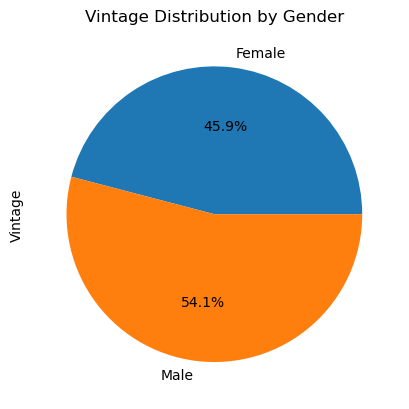

In [140]:
# How many Male and Female own a Vintage Cars

df.groupby('Gender')['Vintage'].count().plot(kind='pie',autopct='%1.1f%%')
plt.title('Vintage Distribution by Gender')
plt.show()

In [113]:
df.corr(numeric_only=True)

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
Age,1.000000,-0.079808,0.042447,-0.254514,0.067181,-0.577731,-0.001323,0.111034
Driving_License,-0.079808,1.000000,-0.001079,0.014969,-0.012522,0.043744,-0.000848,0.010165
Region_Code,0.042447,-0.001079,1.000000,-0.024556,-0.009465,-0.042297,-0.002786,0.010541
Previously_Insured,-0.254514,0.014969,-0.024556,1.000000,0.006875,0.219204,0.002636,-0.341176
Annual_Premium,0.067181,-0.012522,-0.009465,0.006875,1.000000,-0.118495,-0.000634,0.022126
Policy_Sales_Channel,-0.577731,0.043744,-0.042297,0.219204,-0.118495,1.000000,0.000056,-0.138941
Vintage,-0.001323,-0.000848,-0.002786,0.002636,-0.000634,0.000056,1.000000,-0.001046
Response,0.111034,0.010165,0.010541,-0.341176,0.022126,-0.138941,-0.001046,1.000000


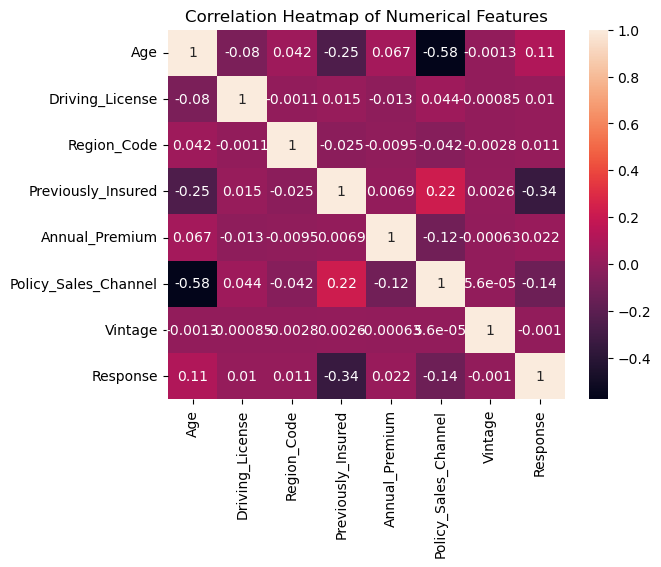

In [141]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()